In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

import os
print(os.getcwd())  # Prints the current working directory

C:\Users\Hp\elevate labs DA internship\task 7


In [2]:
# Create and connect to the database
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

In [3]:
# Create sales table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL,
    sale_date TEXT
)
''')

In [4]:
# Insert sample data
sample_data = [
    ('Laptop', 2, 999.99, '2023-01-15'),
    ('Phone', 5, 699.99, '2023-01-15'),
    ('Tablet', 3, 349.99, '2023-01-16'),
    ('Laptop', 1, 999.99, '2023-01-17'),
    ('Phone', 2, 699.99, '2023-01-18'),
    ('Monitor', 4, 249.99, '2023-01-19'),
    ('Tablet', 2, 349.99, '2023-01-20')
]

In [5]:
cursor.executemany('''
INSERT INTO sales (product, quantity, price, sale_date)
VALUES (?, ?, ?, ?)
''', sample_data)

In [6]:
# Commit changes and close connection
conn.commit()

In [7]:
# Reconnect to the database (if this is a separate step)
conn = sqlite3.connect('sales_data.db')


In [8]:
# Query 1: Get total quantity and revenue by product
query1 = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
ORDER BY revenue DESC
"""


In [9]:
# Query 2: Get overall summary stats
query2 = """
SELECT 
    SUM(quantity) AS total_quantity_sold,
    SUM(quantity * price) AS total_revenue,
    COUNT(DISTINCT product) AS unique_products
FROM sales
"""

In [10]:
# Execute queries and load into pandas DataFrames
df_products = pd.read_sql_query(query1, conn)
df_summary = pd.read_sql_query(query2, conn)

In [11]:
# Close the database connection
conn.close()

In [12]:
# Display the summary statistics
print("=== SALES SUMMARY ===")
print(f"Total Quantity Sold: {df_summary['total_quantity_sold'][0]}")
print(f"Total Revenue: ${df_summary['total_revenue'][0]:,.2f}")
print(f"Unique Products Sold: {df_summary['unique_products'][0]}\n")

=== SALES SUMMARY ===
Total Quantity Sold: 76
Total Revenue: $42,599.24
Unique Products Sold: 4



In [13]:
# Display the product breakdown
print("=== PRODUCT PERFORMANCE ===")
print(df_products.to_string(index=False))

=== PRODUCT PERFORMANCE ===
product  total_qty  revenue
  Phone         28 19599.72
 Laptop         12 11999.88
 Tablet         20  6999.80
Monitor         16  3999.84


<Figure size 1000x600 with 0 Axes>

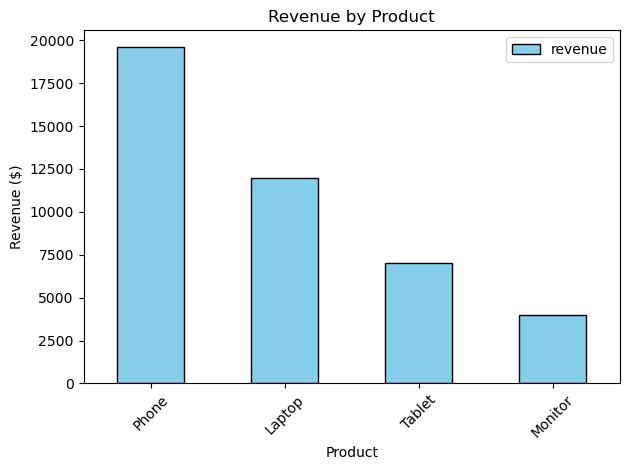

In [14]:
# Create a bar chart of revenue by product
plt.figure(figsize=(10, 6))
df_products.plot(kind='bar', x='product', y='revenue', 
                 color='skyblue', edgecolor='black',
                 title='Revenue by Product')
plt.ylabel('Revenue ($)')
plt.xlabel('Product')
plt.xticks(rotation=45)
plt.tight_layout()

In [15]:
# Save and show the chart
plt.savefig('sales_chart.png')
plt.show()

<Figure size 640x480 with 0 Axes>